In [9]:
from PIL import Image, ImageFilter
import glob
import os
import numpy as np
import cv2
from random import *
import shutil

In [10]:
train_image_path='StreetView/train/images'
train_label_path = 'StreetView/train/labels'
folder= 'part1'

In [11]:
#img = cv2.imread('temp/0.jpg')
#print(img.shape)
os.path.split('StreetView/train/blur/01.jpg')[1]

'01.jpg'

In [12]:
def blurizing_creating_blur_label(train_image_path,train_label_path,filename):
    #image_blur = image.copy()
    image_blur =Image.open(filename)
    img = cv2.imread(filename)
    width, height = image_blur.size
    dic ={'1':{'h1':int( height / 4),'h2':800,'w1':900,'w2':1200,'left':900},
      '2':{'h1':int( height / 3),'h2':600,'w1':100,'w2':600,'left':100},
       '3':{'h1':int( height / 4),'h2':700,'w1':500,'w2':1000,'left':500},
       '4':{'h1':int( height / 4),'h2':700,'w1':700,'w2':1100,'left':700},
       '5':{'h1':int( height / 4),'h2':1000,'w1':100,'w2':600,'left':100},
       '6':{'h1':int(2* height / 4),'h2':1000,'w1':100,'w2':600,'left':100},
       '7':{'h1':int(height / 4),'h2':900,'w1':100,'w2':500,'left':100},
       '8':{'h1':int(height / 5),'h2':800,'w1':700,'w2':1100,'left':700}}
    # Cropping an image
    x = randint(1,8)
    cropped_image = img[dic[str(x)]['h1']:dic[str(x)]['h2'], dic[str(x)]['w1']:dic[str(x)]['w2']]
    cropped_image=cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
    blurred_image = Image.fromarray(cropped_image).filter(ImageFilter.GaussianBlur(20))
    blurred_image = blurred_image.filter(ImageFilter.GaussianBlur(20))
    
    image_blur.paste(blurred_image, (dic[str(x)]['left'], dic[str(x)]['h1']))
    image_blur = image_blur.resize((224,224))
    #image_blur.save(blur_path+'/'+ os.path.split(filename)[1])
    image_blur.save(train_image_path+'/'+'0-'+os.path.split(filename)[1])
    #image_blur.save('{}{}{}'.format(blur_path,'/',os.path.split(filename)[1]))
    #label for blureed image 
    label_img = np.zeros((height, width, 3), dtype = "uint8")
    label_img = Image.fromarray(label_img)
    w,h = Image.fromarray(cropped_image).size
    whiteFrame = 255 * np.ones((h,w,3), np.uint8)
    whiteFrame = Image.fromarray(whiteFrame)
    label_img.paste(whiteFrame,(dic[str(x)]['left'], dic[str(x)]['h1']))
    label_img = label_img.resize((224,224))
    #label_img.save('{}{}{}'.format(blur_label_path,'/',os.path.split(filename)[1]))
    label_img.save(train_label_path+'/'+'0-'+os.path.split(filename)[1])
    #label_img.save('{}{}{}'.format(train_label_path,'/','0-',os.path.split(filename)[1]))
    

In [13]:
def resize_images_creating_label(train_image_path,train_label_path,folder):
    temp = 'temp'
    if not os.path.exists(temp):
        os.makedirs(temp)
    if not os.path.exists(train_image_path):
        os.makedirs(train_image_path)
    if not os.path.exists(train_label_path):
        os.makedirs(train_label_path)
    #starting processing images
    images_list=os.listdir(folder)
    i=0
    for item in images_list[:6000]: #which images
        image = Image.open(folder+"/"+item)   
        image.save(temp +'/' + str(i)+'.jpg', 'JPEG', quality=90) 
        i+=1
    for filename in glob.glob(temp+'/' +'*.jpg'): #path of raw images
        blurizing_creating_blur_label(train_image_path,train_label_path,filename)
        image = Image.open(filename)
        width, height = image.size
        image = image.resize((224,224))
        # save resized images to new folder with existing filename
        #image.save('{}{}{}'.format(no_blur_path,'/',os.path.split(filename)[1]))
        image.save(train_image_path+'/'+'1-'+os.path.split(filename)[1])
        label_img = np.zeros((height, width, 3), dtype = "uint8")
        label_img = Image.fromarray(label_img)
        label_img = label_img.resize((224,224))
        #label_img.save('{}{}{}'.format(no_blur_label_path,'/',os.path.split(filename)[1]))
        label_img.save(train_label_path+'/'+'1-'+os.path.split(filename)[1])
        
    shutil.rmtree(temp)
    

In [14]:
resize_images_creating_label(train_image_path,train_label_path,folder)

In [15]:
from PIL import Image
from numpy import *
images = []
files = glob.glob ("StreetView/train/images/*.jpg")
for myFile in files:
    image = array(Image.open(myFile))
    images.append (image)
images = np.array(images) 
images= np.reshape(images,[images.shape[0],images.shape[1],images.shape[2],images.shape[3]])
np.save('total-images',images)

In [16]:
from PIL import Image
from numpy import *
images = []
files = glob.glob ("StreetView/train/labels/*.jpg")
for myFile in files:
    image = array(Image.open(myFile))
    images.append (image)
images = np.array(images) 
images= np.reshape(images,[images.shape[0],images.shape[1],images.shape[2],images.shape[3]])
np.save('label-images',images)

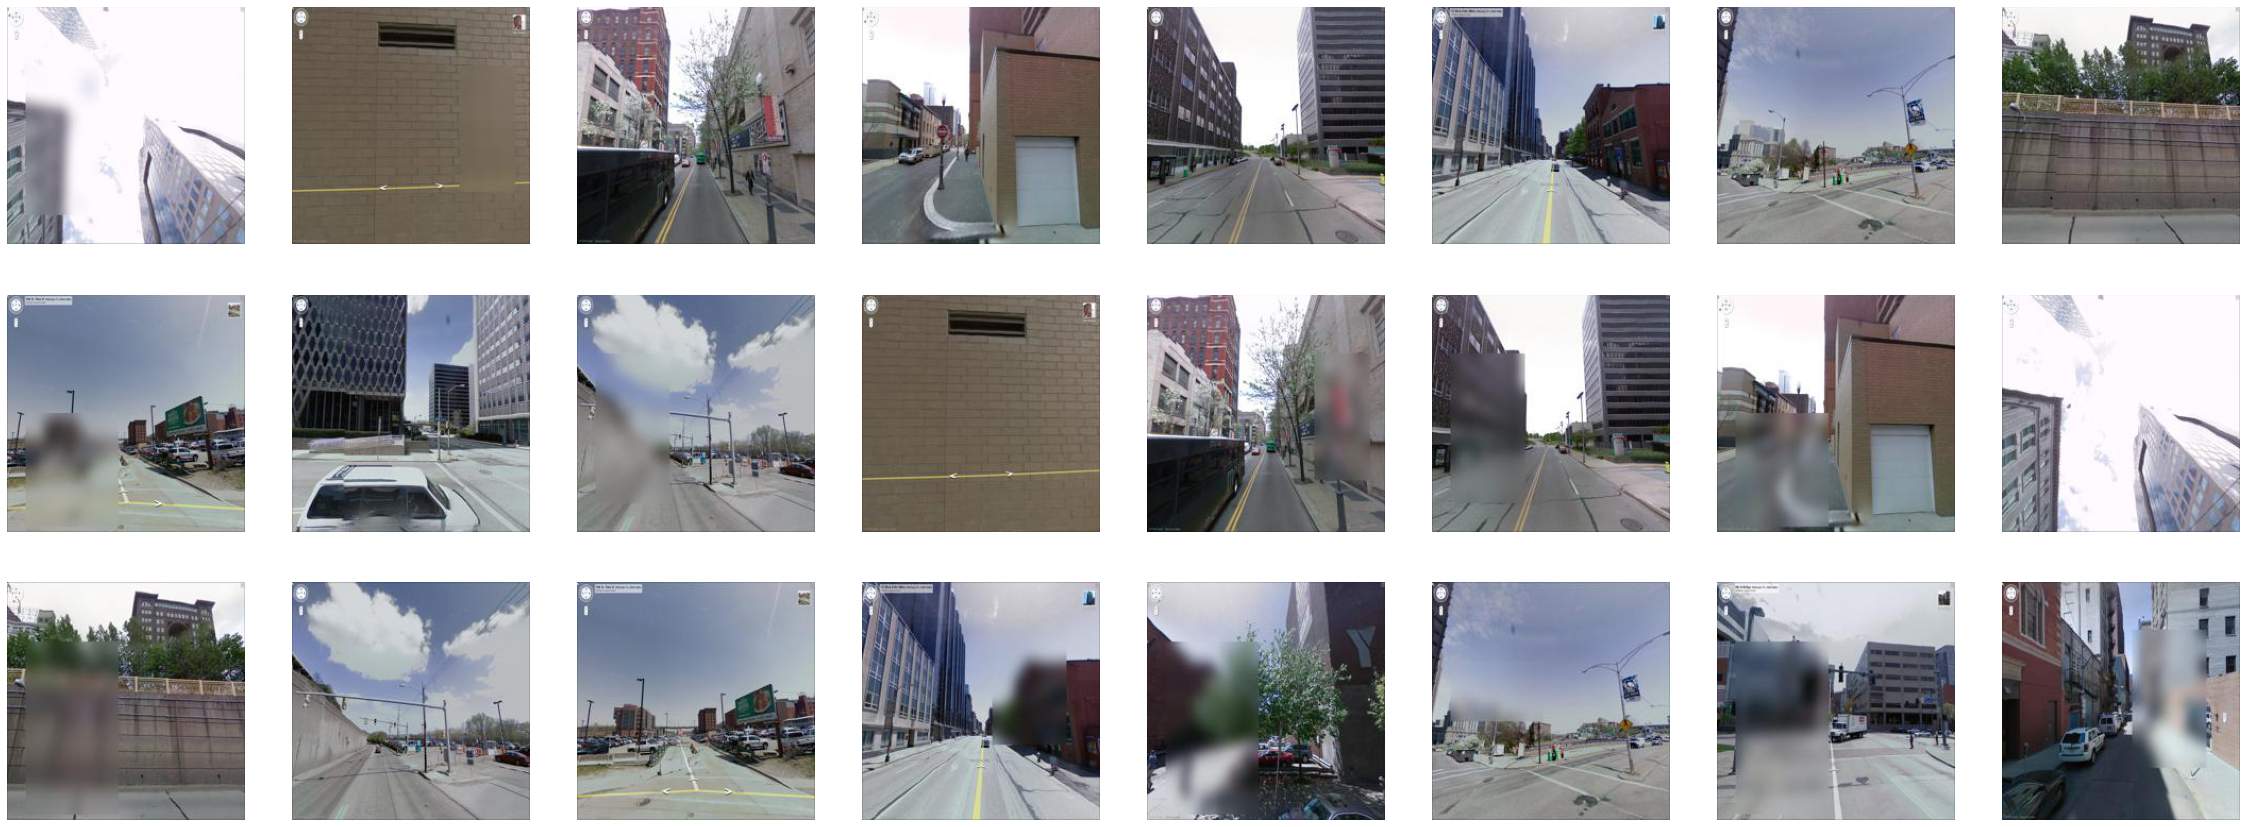

In [17]:
import matplotlib.pyplot as plt
images = np.load('total-images.npy')
fig = plt.figure(figsize=(40, 15))
columns = 8
rows = 3
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(images[i],cmap='binary')
    plt.axis("off")
plt.show()

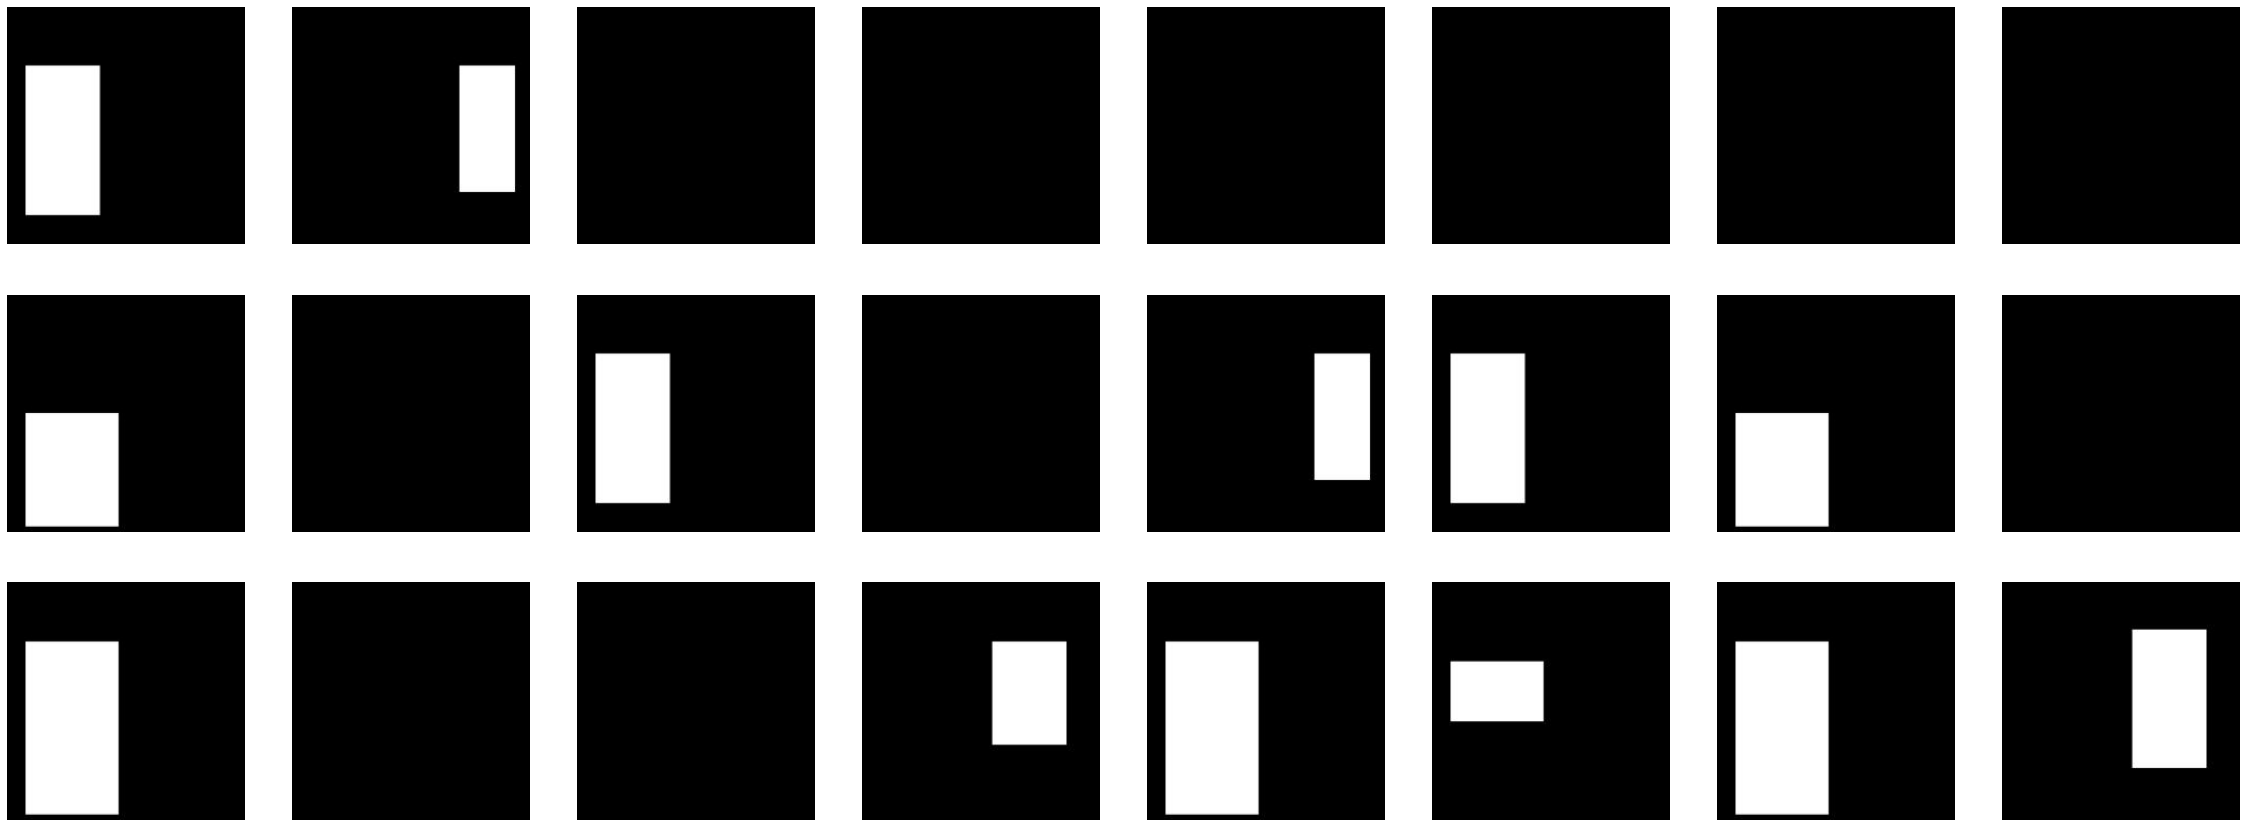

In [18]:
import matplotlib.pyplot as plt
images = np.load('label-images.npy')
fig = plt.figure(figsize=(40, 15))
columns = 8
rows = 3
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(images[i],cmap='binary')
    plt.axis("off")
plt.show()